# Setup

### Basic

In [1]:
import pandas as pd
import numpy as np

### Plots

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

### data preprocessing

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

### Machine Learning

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

### additional Packages

In [5]:
from pandas_profiling import ProfileReport

# Data + EDA

In [6]:
df = pd.read_csv("../diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
def EDA(df) : 
    plt.figure(figsize = (15, 15))
    
    cnt = 1
    for col in df.columns : 
        plt.subplot(3, 3, cnt); cnt += 1;
        sns.histplot(data = df, x = col, hue = "Outcome")
    plt.show()   

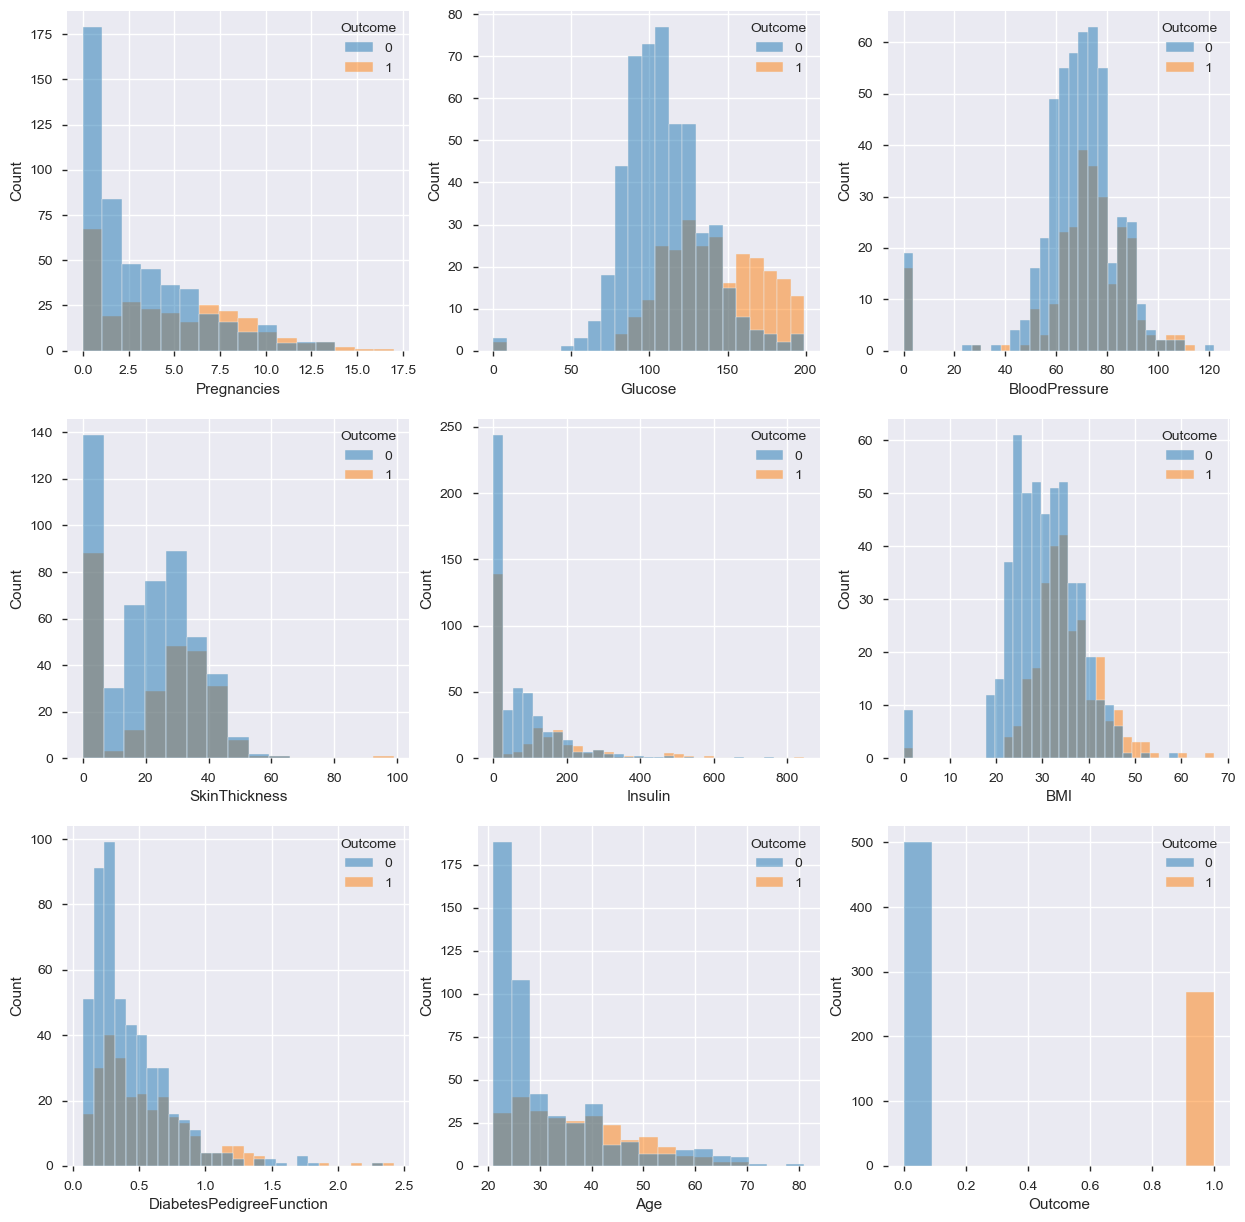

In [9]:
EDA(df)

## Pandas Profiling

In [10]:
profile =  ProfileReport(df, title = "Diabetes Report")
profile.to_widgets()

# Data Preprocessing

In [11]:
COLS = df.columns.drop('Outcome')
df.head(), COLS

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age'],
       dtype='object'))

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Correlation HITMAP

Text(0.5, 1.0, 'Correlation between Features')

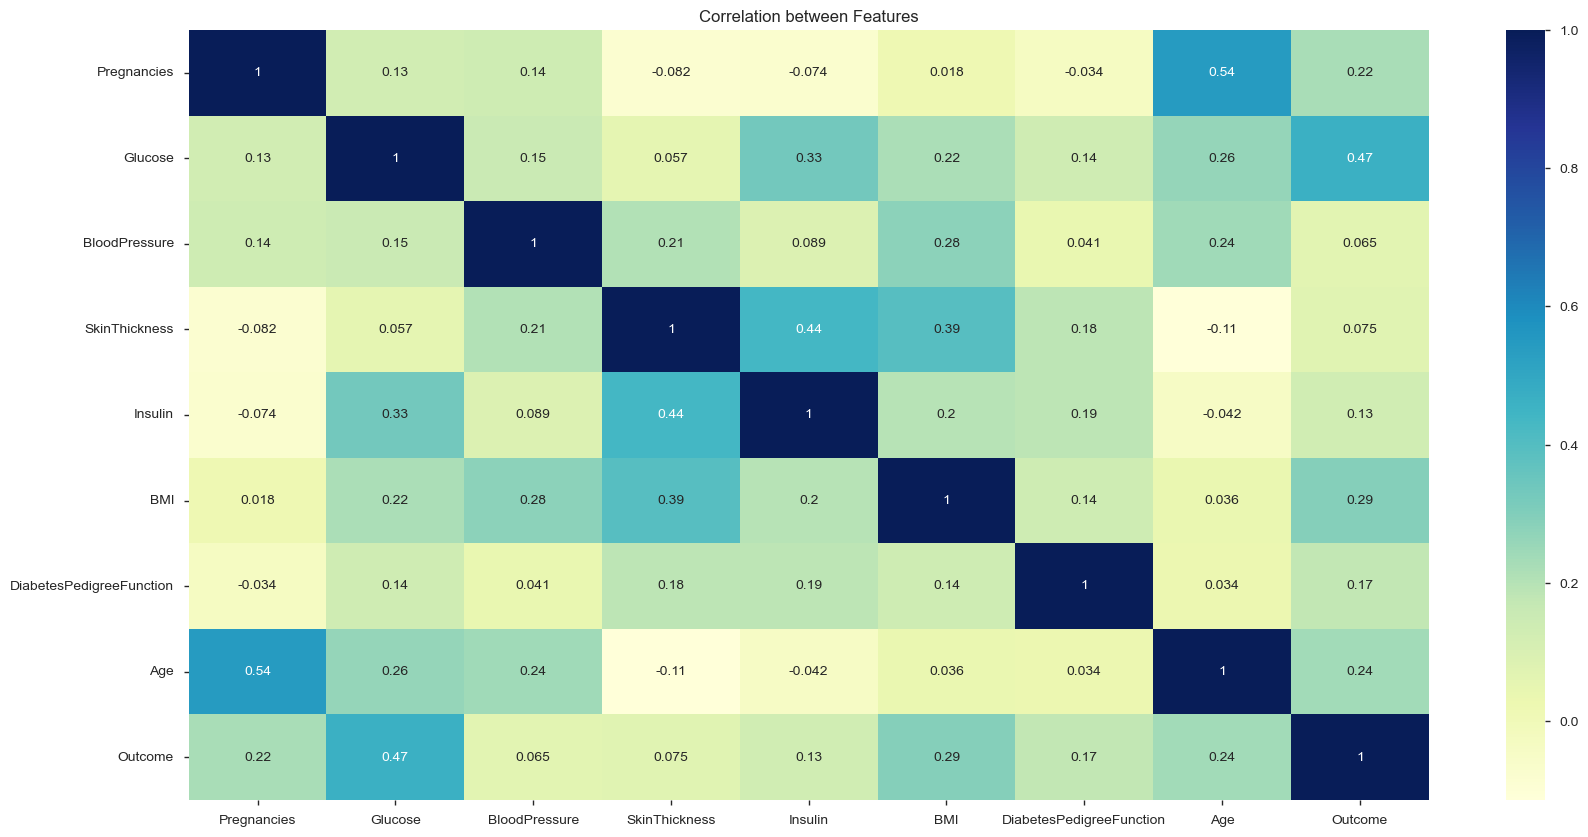

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlGnBu' )

plt.title("Correlation between Features")

## Missing Values

In [15]:
zero_null_fields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_null_fields] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
def handle_missing(data, column:str):
    data.loc[(data['Outcome'] == 0 ) & (data[column].isnull()), column] = df.groupby('Outcome')[column].median()[0]
    data.loc[(data['Outcome'] == 1 ) & (data[column].isnull()), column] = df.groupby('Outcome')[column].median()[1]
    
    return data

cols = ['Glucose', 'BloodPressure', 'BMI']

for col in cols:
    handle_missing(df, col)
    
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### SkinThickness & Insulin

In [17]:
knn_imp = KNNImputer(n_neighbors = 5)
df.loc[:, :] = knn_imp.fit_transform(df)

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Outliers

In [19]:
def handle_outlier(df, col) : 
    # IQR
    q1 = 0.25; q3 = 0.90
    
    Q1 = df[col].quantile(q1)
    Q3 = df[col].quantile(q3)
    iqr = Q3 - Q1
    
    up_b = Q3 + 1.5 * iqr
    low_b = Q1 - 1.5 * iqr
    
    df.loc[(df[col] < low_b), col] = low_b
    df.loc[(df[col] > up_b), col] = up_b

In [20]:
for col in df.columns : 
    handle_outlier(df, col)

## Scaling Data

In [21]:
rs = RobustScaler()
df[COLS] = rs.fit_transform(df[COLS])

## Drop Insulin (Bad :/)

In [87]:
df = df.drop(['Insulin'], axis = 1)
df

KeyError: "['Insulin'] not found in axis"

## Pandas Profiling (after Preprocessing)

In [23]:
#profile =  ProfileReport(df, title = "Diabetes Report")
#profile.to_widgets()

# Machine Learning

## Train-Test Split

In [24]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

xxx = x
yyy = y

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y, shuffle = True)

## Balancing

In [26]:
oversample = SMOTE(random_state = 42, k_neighbors = 10)

x_smote, y_smote = oversample.fit_resample(x_train, y_train)
x_train, y_train = x_smote, y_smote

In [27]:
y_smote.value_counts()

0.0    400
1.0    400
Name: Outcome, dtype: int64

### Classifiers

In [28]:
# models 
classifiers = [
    DecisionTreeClassifier(max_depth = 3, random_state = 42),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = 42)),
    RandomForestClassifier(max_depth = 5, random_state = 42),
    GradientBoostingClassifier(random_state = 42),
    LogisticRegression(random_state = 42, solver='lbfgs', max_iter=10000),
    SVC(random_state = 42, probability = True),        
    KNeighborsClassifier(n_neighbors = 5, algorithm = "kd_tree"),
    GaussianNB(),
    MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes=(5, 2), random_state = 1),
    BaggingClassifier(SVC(random_state = 42, probability = True), max_samples = 0.5, max_features = 0.7),
    ExtraTreesClassifier(n_estimators = 10, max_depth = None, min_samples_split = 2, random_state = 0),
    XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
]

In [29]:
def make_classification(classifiers, x_train, x_test, y_train, y_test) :
    
    # metrics
    acc, f1, AUC, recall, cross_val, prec = [ ], [ ], [ ], [ ], [ ], [ ]
    models = [ ]
    
    for classifier in classifiers : 
        clf = classifier
        clf.fit(x_train, y_train)
        
        y_pred = clf.predict(x_test)
        y_prob = clf.predict_proba(x_test)
        
        acc.append(((accuracy_score(y_test,y_pred))) * 100)
        cross_val.append(sum(cross_val_score(clf, x_train, y_train, cv = 10, scoring = "accuracy"))/10)
        f1.append(((f1_score(y_test,y_pred))) * 100)
        AUC.append(((roc_auc_score(y_test,y_prob[:, 1]))) * 100)
        recall.append(((recall_score(y_test,y_pred))) * 100)
        prec.append(((precision_score(y_test,y_pred))) * 100)
        models.append(clf.__class__.__name__)
        
    res = pd.DataFrame({
        "Accuracy" : acc,
        "Cross Val" : cross_val,
        "F1" : f1,
        "ROC" : AUC,
        "Recall" : recall,
        "Precision" : prec,
        "ML Models" : models,
    })
    
    res = (res.sort_values(by = ['ROC','F1'], ascending = False).reset_index(drop =  True))
    return res

In [30]:
res = make_classification(classifiers, x_train, x_test, y_train, y_test)
res

[21:14:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:17] WARNING:

,Accuracy,Cross Val,F1,ROC,Recall,Precision,ML Models
0,74.675325,0.79375,68.800000,82.981481,79.629630,60.563380,XGBClassifier
1,70.779221,0.78375,66.165414,82.407407,81.481481,55.696203,RandomForestClassifier
2,72.727273,0.80000,66.129032,81.888889,75.925926,58.571429,GradientBoostingClassifier
3,74.025974,0.73375,67.213115,81.351852,75.925926,60.294118,LogisticRegression
4,76.623377,0.78875,70.967742,81.092593,81.481481,62.857143,SVC
5,69.480519,0.76875,63.565891,80.037037,75.925926,54.666667,BaggingClassifier
6,73.376623,0.83625,60.194175,79.703704,57.407407,63.265306,ExtraTreesClassifier
7,71.428571,0.76250,64.516129,79.611111,74.074074,57.142857,MLPClassifier
8,68.831169,0.71375,61.904762,78.833333,72.222222,54.166667,GaussianNB
9,69.480519,0.72250,65.693431,77.379630,83.333333,54.216867,DecisionTreeClassifier


### Ensemble

In [31]:
gb_clf = GradientBoostingClassifier(random_state = 42)
rf_clf = RandomForestClassifier(max_depth = 5, random_state = 42)
nn_clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes=(5, 2), random_state = 1)
svm_clf = SVC(random_state = 42, probability = True)
svm_bg_clf = BaggingClassifier(SVC(random_state = 42, probability = True), max_samples = 0.5, max_features = 0.7)
xgb_clf = XGBClassifier(learning_rate= 0.01,max_depth = 3, n_estimators = 1000)

In [32]:
voting_clf = VotingClassifier(
 estimators = [('gb', gb_clf), ('rf', rf_clf), ('svm_bagging', svm_bg_clf)],
 voting = 'soft')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     random_state=42)),
                             ('svm_bagging',
                              BaggingClassifier(base_estimator=SVC(probability=True,
                                                                   random_state=42),
                                                max_features=0.7,
                                                max_samples=0.5))],
                 voting='soft')

In [33]:
y_pred = voting_clf.predict(x_test)
y_prob = voting_clf.predict_proba(x_test)

In [34]:
pd.Series({"Acc :" : accuracy_score(y_test, y_pred) * 100,"F1 : " : f1_score(y_test, y_pred) * 100,"AUC : " : roc_auc_score(y_test,y_prob[:, 1]) * 100,"Recall : " : ((recall_score(y_test,y_pred))) * 100})

Acc :        74.025974
F1 :         68.750000
AUC :        83.185185
Recall :     81.481481
dtype: float64

## Cross Validation 

In [35]:
def cross_val(classifiers, x_train, y_train) :
    cv_train, cv_test, diff, models =  [], [], [], []
    
    for classifier in classifiers : 
        clf = classifier
        #clf.fit(x_train, y_train)
        
        cv = cross_validate(clf, x_train, y_train, cv = 5, scoring = "accuracy", return_train_score = True)
        
        cv_train.append(cv['train_score'].mean() * 100)
        cv_test.append(cv['test_score'].mean() * 100)
        diff.append((cv['train_score'].mean() - cv['test_score'].mean()) * 100)
        models.append(clf.__class__.__name__)
        
        
    res = pd.DataFrame({
        "CV Train" : cv_train,
        "CV Test" : cv_test,
        "Diff" : diff,
        "ML Model" : models
    })
    
    res = (res.sort_values(by = ['CV Test', 'CV Train'], ascending = False).reset_index(drop =  True))
    
    return res

In [36]:
nclf = classifiers
nclf.pop(8)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [37]:
nclf.append(
    VotingClassifier(
 estimators = [('gb', gb_clf), ('rf', rf_clf), ('svm_bagging', svm_bg_clf)],
 voting = 'soft')
)

In [38]:
nclf

[DecisionTreeClassifier(max_depth=3, random_state=42),
 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42)),
 RandomForestClassifier(max_depth=5, random_state=42),
 GradientBoostingClassifier(random_state=42),
 LogisticRegression(max_iter=10000, random_state=42),
 SVC(probability=True, random_state=42),
 KNeighborsClassifier(algorithm='kd_tree'),
 GaussianNB(),
 BaggingClassifier(base_estimator=SVC(probability=True, random_state=42),
                   max_features=0.7, max_samples=0.5),
 ExtraTreesClassifier(n_estimators=10, random_state=0),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.01, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=1000, n_jobs=8,
       

In [39]:
cv_res = cross_val(nclf, x_train, y_train)
cv_res

[21:14:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:14:31] WARNING:

,CV Train,CV Test,Diff,ML Model
0,100.00000,81.375,18.62500,ExtraTreesClassifier
1,84.68750,80.375,4.31250,KNeighborsClassifier
2,95.37500,79.375,16.00000,GradientBoostingClassifier
3,84.34375,79.375,4.96875,SVC
4,89.75000,78.625,11.12500,VotingClassifier
5,86.56250,78.625,7.93750,RandomForestClassifier
6,92.09375,78.375,13.71875,XGBClassifier
7,80.84375,77.125,3.71875,BaggingClassifier
8,74.25000,72.875,1.37500,LogisticRegression
9,100.00000,72.625,27.37500,AdaBoostClassifier


## Fine Tuning

### 1) GradientBoostingClassifier

In [40]:
gb_clf = GradientBoostingClassifier( 
    random_state = 42, 
    min_samples_split = 100,
    min_samples_leaf = 20,
    max_depth = 2,
    max_features = 3,
    learning_rate = 0.05,
    subsample = 0.65,
)

In [41]:
cross_val([gb_clf], x_train, y_train)

,CV Train,CV Test,Diff,ML Model
0,82.8125,78.0,4.8125,GradientBoostingClassifier


### 2) ExtraTreesClassifier

In [42]:
ex_clf = ExtraTreesClassifier(
    random_state = 42,
    max_depth = 6,
    min_samples_split = 20,
    max_features = "log2",
)

In [43]:
cross_val([ex_clf], x_train, y_train)

,CV Train,CV Test,Diff,ML Model
0,82.125,78.0,4.125,ExtraTreesClassifier


### 3) SVC

In [44]:
svm_clf = SVC(
    random_state = 42,
    probability = True,
    C = 1,
    kernel = "rbf",
    gamma = "scale",
)

In [45]:
cross_val([svm_clf], x_train, y_train)

,CV Train,CV Test,Diff,ML Model
0,84.34375,79.375,4.96875,SVC


### 4) Ensemble

In [46]:
voting_clf = VotingClassifier(
    estimators = [('gb', gb_clf), ('ex', ex_clf), ('svm', svm_clf)],
    voting = 'soft'
)

In [47]:
cross_val([voting_clf], x_train, y_train)

,CV Train,CV Test,Diff,ML Model
0,83.5,78.5,5.0,VotingClassifier


In [48]:
make_classification([ex_clf, svm_clf, gb_clf, voting_clf], x_train, x_test, y_train, y_test)

,Accuracy,Cross Val,F1,ROC,Recall,Precision,ML Models
0,73.376623,0.78250,67.200000,82.796296,77.777778,59.154930,VotingClassifier
1,72.727273,0.77750,67.187500,82.796296,79.629630,58.108108,ExtraTreesClassifier
2,74.675325,0.78375,68.800000,82.333333,79.629630,60.563380,GradientBoostingClassifier
3,76.623377,0.78875,70.967742,81.092593,81.481481,62.857143,SVC


In [49]:
y_pred_vt = voting_clf.predict(x_test)
y_pred_gb = gb_clf.predict(x_test)

In [50]:
accuracy_score(y_test, y_pred_vt) * 100, accuracy_score(y_test, y_pred_gb) * 100, 

(73.37662337662337, 74.67532467532467)

In [51]:
cross_val([voting_clf, gb_clf], x_train, y_train)

,CV Train,CV Test,Diff,ML Model
0,83.5000,78.5,5.0000,VotingClassifier
1,82.8125,78.0,4.8125,GradientBoostingClassifier


In [52]:
cross_val([voting_clf, gb_clf], x, y)

,CV Train,CV Test,Diff,ML Model
0,81.836445,76.697224,5.139221,VotingClassifier
1,81.445671,75.787285,5.658387,GradientBoostingClassifier


# Using PCA (Just a Showcase)

#### in this problem due to low number of demensions we do not need Demensionality Reduction Methods and Using PCA here is just for educational purposes

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA()
pca.fit(x_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [55]:
d

7

In [56]:
pca = PCA(n_components = 0.90)
x_redu = pca.fit_transform(x_train)

In [57]:
pca_gb_clf = GradientBoostingClassifier( 
    random_state = 42, 
    min_samples_split = 100,
    min_samples_leaf = 20,
    max_depth = 2,
    max_features = 3,
    learning_rate = 0.05,
    subsample = 0.65,
)

In [58]:
cross_val([pca_gb_clf], x_redu, y_train)

,CV Train,CV Test,Diff,ML Model
0,81.625,77.125,4.5,GradientBoostingClassifier


# BEST MODEL

### as we saw in the previous parts of this notebook we had out 2 best models as "Ensemble" and "GradientBoosting" now its time to compare them in different metrics and declare a winner

# Results

In [59]:
make_classification([gb_clf, voting_clf], x_train, x_test, y_train, y_test)

,Accuracy,Cross Val,F1,ROC,Recall,Precision,ML Models
0,73.376623,0.78250,67.2,82.796296,77.777778,59.15493,VotingClassifier
1,74.675325,0.78375,68.8,82.333333,79.629630,60.56338,GradientBoostingClassifier


## 1) Accuracy

not the most important metric in this problem 

as we can see the **GB Classifier** is slightly doing better 

## 2) Precision

both have rather low precision but once again **GB Classifer** is doing better even much better ! **considering the 3.5% difference**

## 3) Recall

in my eyes in this particular problem recall can be one of the most if not the most important metric

the reasoning behind this idea is that it is really important to correctly detect the ones that have diabetes cause if not, they wont be diagnosed and as a result they will not be cured which may have some detrimental consequences

as well as the other metrics **GB Classifier** is doing better my the smallest margin, but its still better !

## 4) F1

well this one is obviously a win for **GB Classifier**

## 5) AUC

roc curve is also a really useful metric for this problem and one way to measure it is using **AUC (Area Under Curve)**

as we already had figured it out, **GB Classifier** has the upper hand

### Overfitting / Underfitting

none of these two has underfitting by any means

as for overfitting based of what we saw in the previous parts of this notebook we can say that none of these has overfitting problem as well however the diffrence between train/test in **GB Classifier** is somewhat smaller which makes it a slightly more stable model

# Conclusion

based on all models and parameter tuning that we did we can safely say that **"Gradient Boosting Classifer"** is our best model

In [60]:
make_classification([gb_clf], x_train, x_test, y_train, y_test)

,Accuracy,Cross Val,F1,ROC,Recall,Precision,ML Models
0,74.675325,0.78375,68.8,82.333333,79.62963,60.56338,GradientBoostingClassifier


In [61]:
cross_val([gb_clf], x, y)

,CV Train,CV Test,Diff,ML Model
0,81.445671,75.787285,5.658387,GradientBoostingClassifier


In [62]:
y_scores = cross_val_predict(gb_clf, x, y, cv = 3, method = "decision_function")

In [63]:
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

In [64]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds) : 
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")


# Precision-Recall Curve

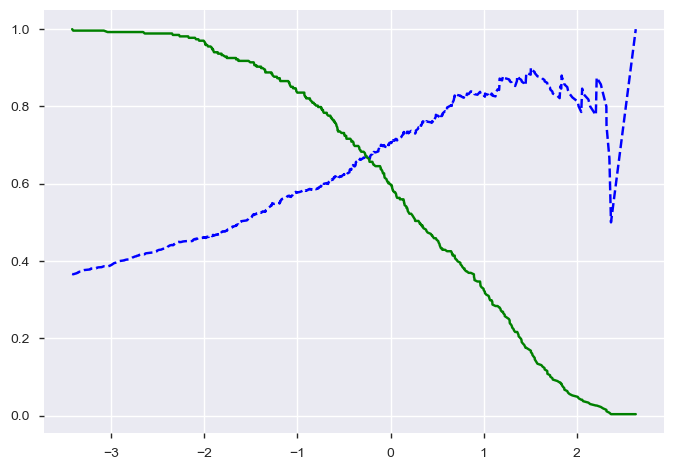

In [65]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [66]:
fpr, tpr, thresholds = roc_curve(y, y_scores)

In [67]:
def plot_roc_curve(fpr, tpr, label = None) :
    plt.plot(fpr, tpr, linewidth = 2,label = label)
    plt.plot([0, 1], [0, 1], 'k--')

# ROC Curve

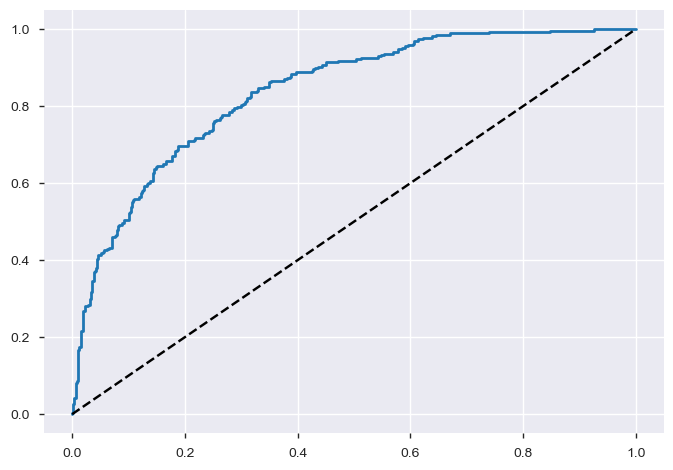

In [68]:
plot_roc_curve(fpr, tpr, "ROC Curve")
plt.show()

In [69]:
roc_auc_score(y, y_scores)

0.8384626865671643